Exercicio 1

Deve-se criar uma matriz zerada, onde devemos realizar a soma das vazões nos pontos 
Para tal, escalonamos o sistemas e o transferimos para uma matriz igual a gerada por este codigo

In [131]:
import numpy as np
import matplotlib.pyplot as plt

conect =np.array([[1,2],[2,3],[3,4],[4,5],[5,2],[5,3],[5,1]])
vet = np.array([2,2,1,2,1,2,2])

In [132]:
# n1 e n2, serão os indices que adivindo da matriz conect e 
#que usaremos para realizar a soma dos elementos do vetor c e que depois passarao a ser incluido em a
#para um dado k pertencente à ao numero de canos, extraimos os valores correspondete em n1 e n2 
#que em seguida foram utilizados como indices do somatorio de condutaâncias na matriz a
#em seguida, dados que para i igual a j realizamos o somatorios, para os indices que nao são diferentes
#os os elementos serão o oposto da condutancia e para aqueles que não possuem nenhuma conexão, continuaram igual a 0'''

In [133]:
def assembly(conec, c, nc, nv):
  
    a = np.zeros(shape=(nv, nv)) #matriz zerada
     
    for k in range(nc):
        n1 =conec[k,0]-1
        n2=conec[k,1]-1

        a[n1,n2] += c[k]
        a[n2,n1] += c[k]
        a[n1,n1] += c[k]
        a[n2,n2] += c[k]
   
    for i in range(nv):
        for j in range(nv):
            if( i != j and a[i,j] !=0):
                a[i,j]*=-1
    return a


In [134]:
 #numero de nos 
nv = 5 
nc = 7 # numero de canos
print(assembly(conect,vet,nc,nv))

[[ 4. -2.  0.  0. -2.]
 [-2.  5. -2.  0. -1.]
 [ 0. -2.  5. -1. -2.]
 [ 0.  0. -1.  3. -2.]
 [-2. -1. -2. -2.  7.]]


EXERCICIO 2

Sistema de resolução dos sistema

natm é o indice do nó em que a pressão é fixada( patm =0)
 
nb é o indice do nó em que a bomba é conectada sobre a matriz ã

amn, se m!= natm
0, se m = atm e n != natm
1, se m = n = natm

Sobre o vetor b
 0, se n !=atm | Qb, se m = nb| 0, se n = natm 

In [135]:

def SolveNetwork(conec,c, natm, nb, qb,nc,nv):
    Atilde = assembly(conec, c,nc,nv)
    natm -= 1
    nb -= 1
    
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    b = np.zeros(shape=(len(Atilde), 1))
    b[nb] = qb
    pressure = np.linalg.solve(Atilde, b)
    return pressure


In [136]:
press = (SolveNetwork(conect, vet, 3, 1, 3,nc,nv))
print(press)

[[1.39772727e+00]
 [6.81818182e-01]
 [1.11022302e-16]
 [4.09090909e-01]
 [6.13636364e-01]]


Exe 3

Fazer uma função de python que calcula o vetor de vazões na
rede segundo o explicado anteriormente. Explicar como é que
o cálculo das matrizes K e D leva a determinar as vazões.


In [137]:
def matrizes(conec,c):
    nc = len(conec)
    nv = max(conec[:,0])
   
    #K = np.diag(c)
    K = np.zeros(shape=(nc, nc))
    d = np.zeros(shape=(nc, nv))

    for i in range(nc):
        K[i,i] = c[i]

    for k in range(nc):
        for j in range(nv):
            j1 = conec[k,0]-1
            j2 =conec[k,1]-1
            d[k,j1] = 1
            d[k,j2] = -1 
    
    return K, d



In [138]:
def calc_vazao(conec, c, pressao):
    nc = len(conec)
    nv = max(conec[:, 0])
    K = np.zeros(shape=(nc, nc))
    D = np.zeros(shape=(nc,nv))

    K, D = matrizes(conect, c)
    Q =((K @ D) @ pressao) 

    return Q

vetP =(SolveNetwork(conect, vet, 3, 1, 3,nc,nv)) 
vetQ = calc_vazao(conect, vet, vetP)
print(vetQ)


[[ 1.43181818]
 [ 1.36363636]
 [-0.40909091]
 [-0.40909091]
 [-0.06818182]
 [ 1.22727273]
 [-1.56818182]]


EXE 4 


In [139]:
def transpostamat(B):

    nlb = len(B) #tamanho de linha de B
    ncb = len(B[0]) #tamanho de colunas de B
    bt = np.zeros(shape=(ncb,nlb))

    for m in range(ncb):
       for n in range(nlb):
           bt[m,n] = B[n,m]

    return  bt 

def calc_W(conec, pressao):
    nc = len(conec)
    nv = max(conec[:, 0])
    K = np.zeros(shape=(nc, nc))
    D = np.zeros(shape=(nc,nv))

    K, D = matrizes(conec, vet)
    #Q =((K @ D) @ pressao) 

    W = np.transpose(pressao) @ (np.transpose(D)@ K @ D)@ pressao

    return W
 
print(calc_W(conect, vetP))




[[4.19318182]]


Exe 5


In [140]:


def Assembly(conec, c, nv, nc):
    a = np.zeros(shape=(nv, nv)) #matriz zerada
 
    for k in range(nc):
        n1 =conec[k,0]
        n2=conec[k,1]
        a[n1,n2] += c[k]
        a[n2,n1] += c[k]
        a[n1,n1] += c[k]
        a[n2,n2] += c[k]

    for i in range(nv):
        for j in range(nv):
            if( i != j and a[i,j] !=0):
                a[i,j]*=-1
    
    return a

def SolveNetwork(conec,c, natm, nb, qb,nv, nc):
    Atilde = Assembly(conec, c, nv, nc)
    natm -= 1
    nb -= 1
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    b = np.zeros(shape=(len(Atilde), 1))
    b[nb] = qb
    pressure = np.linalg.solve(Atilde, b)
    return pressure



In [141]:
def GeraRede(nx,ny,CH,CV):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
      for j in range(ny):
        ig = i + j*nx
        coord[ig,0] = i
        coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
          k = j*(nx-1) + i
          conec[k,0] = j*nx + i
          conec[k,1] = j*nx + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(nx):
      for j in range(ny-1):
          k = (nx-1)*ny + j*nx + i
          conec[k,0] = i + j*nx
          conec[k,1] = i + (j+1)*nx
          C[k] = CV

    return nv, nc, conec, C, coord

In [142]:
def PlotPressure(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()

def PlotPressureAsSurface(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, cmap='jet', edgecolor=None)
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
    ax.view_init(elev=30., azim=45)
    plt.show()

In [143]:
CH = 1.3
CV = 3.6
nx, ny = 12,10
nv2,nc2, conec2, C2, coord = GeraRede(nx, ny , CH, CV)
P = SolveNetwork(conec2,C2, 120,1,3, nv2, nc2)
#print(P)

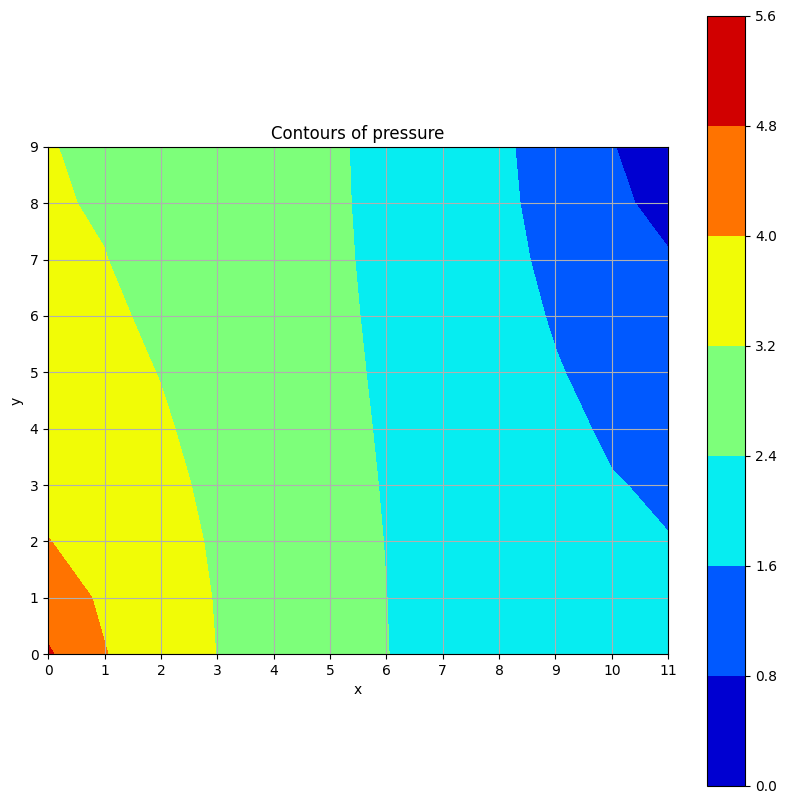

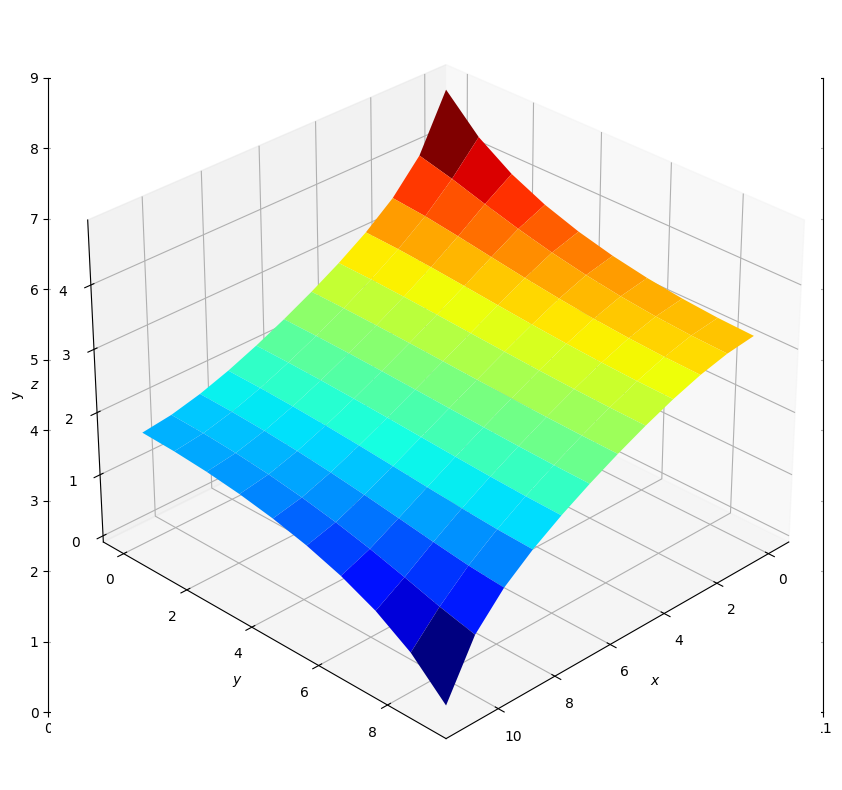

In [144]:
PlotPressure(12,10, P)
PlotPressureAsSurface(12,10, P)



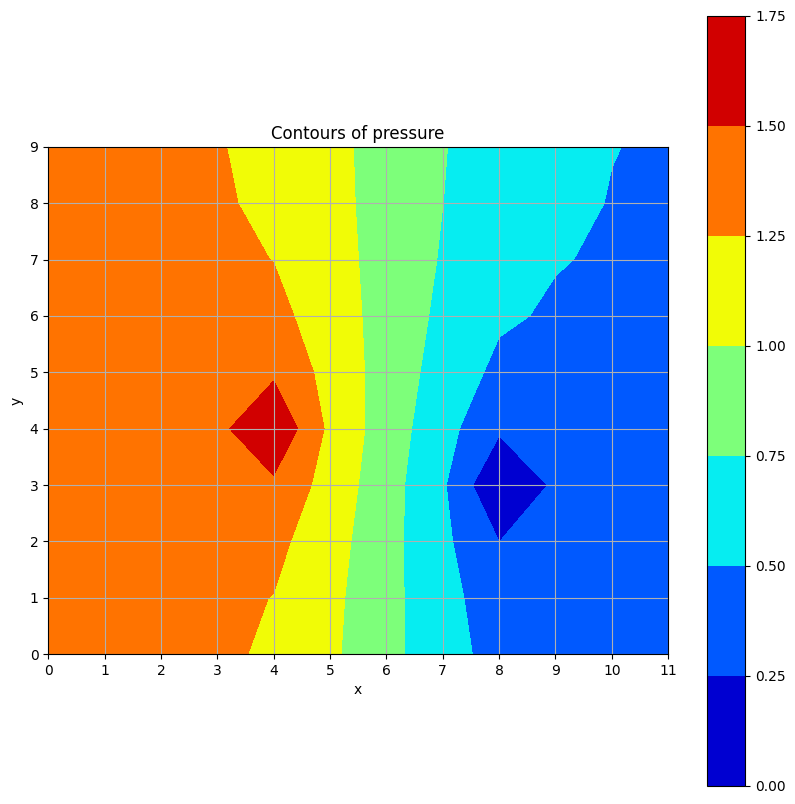

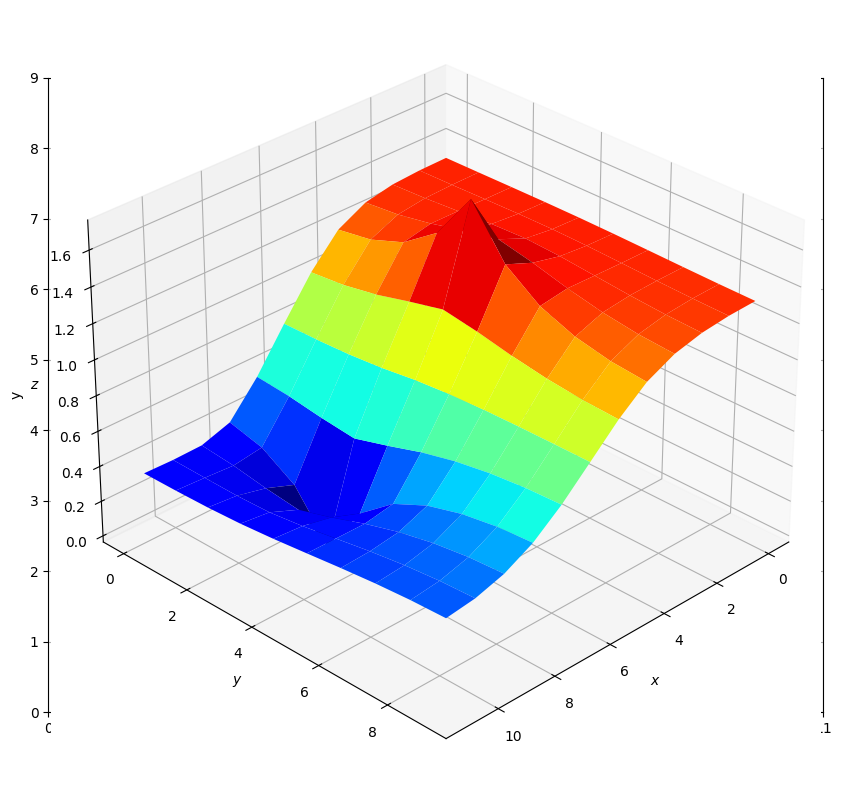

In [145]:
CH = 1.3
CV = 3.6
nx, ny = 12,10
nv2,nc2, conec2, C2, coord = GeraRede(nx, ny , CH, CV)
P2 = SolveNetwork(conec2,C2, 45,53,3, nv2, nc2)
PlotPressure(12,10,P2)
PlotPressureAsSurface(12,10,P2)

Exe 6

In [146]:
import time

tempo = []
tamanhos =[10,20,30,40,50,60,70,90,100]
indices = []
for i in (tamanhos):
    n,m,vetcone, cond, coorde = GeraRede(i,i,CH, CV)
    ti = time.time()
    p= SolveNetwork(vetcone,cond,i*i,1,3,n,m)
    tempo.append(time.time() - ti)
    indices.append(n)


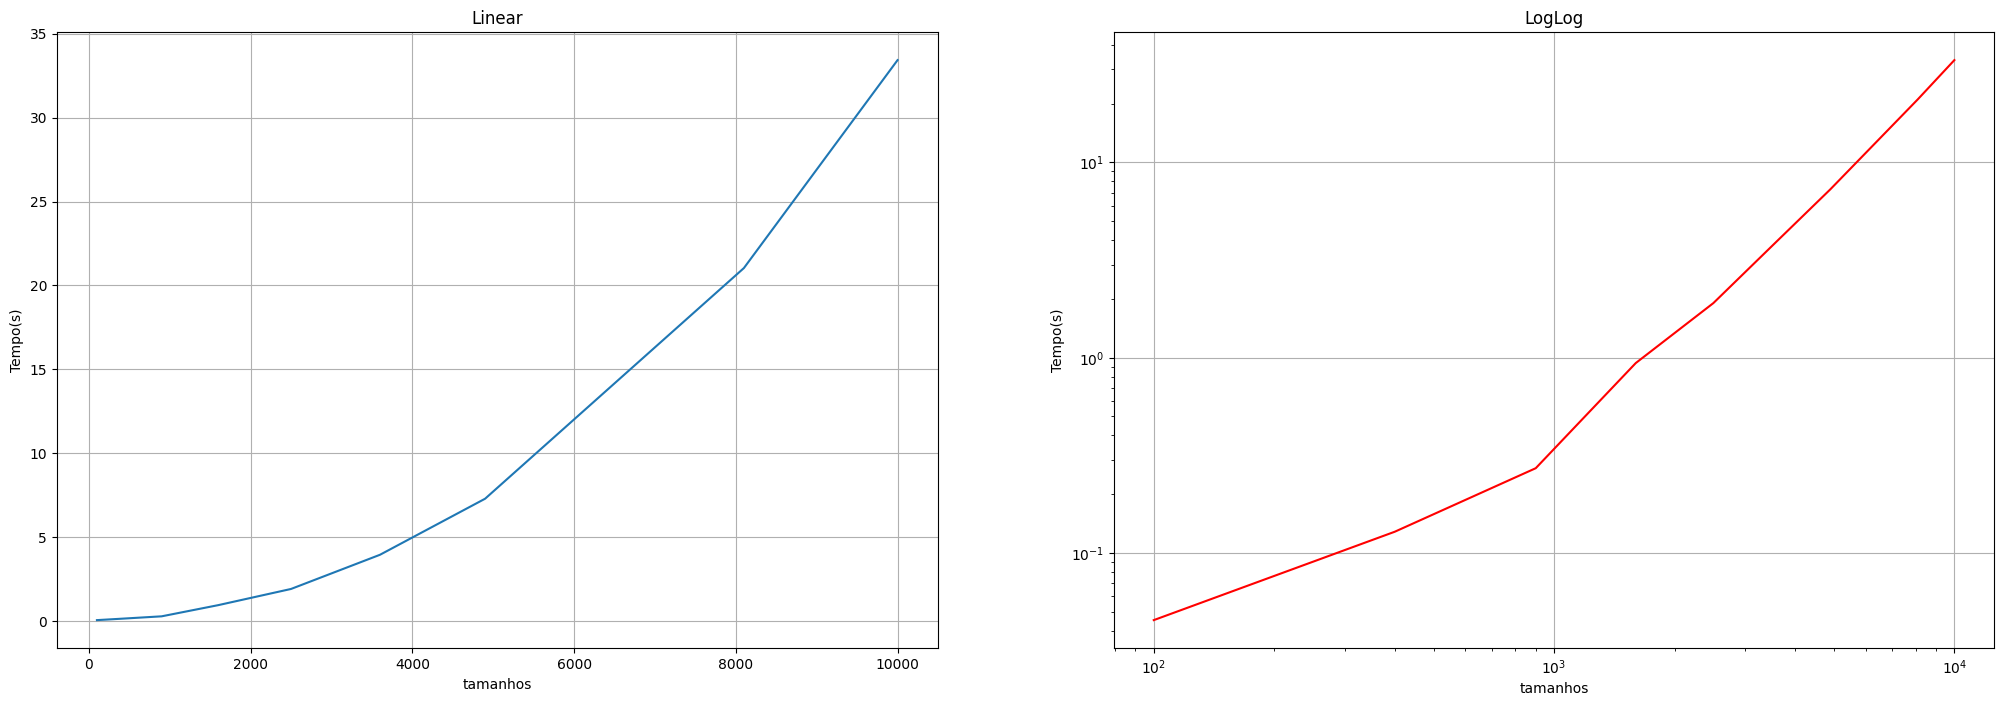

In [147]:
fig, ax = plt.subplots(1, 2,figsize=(25,8))

ax[0].plot(indices, tempo)
ax[0].grid()
ax[0].set_title('Linear')
ax[0].set_xlabel("tamanhos")
ax[0].set_ylabel("Tempo(s)")

ax[1].loglog(indices, tempo, '-r')
ax[1].grid()
ax[1].set_title('LogLog')
ax[1].set_xlabel("tamanhos")
ax[1].set_ylabel("Tempo(s)")



plt.show()